In [9]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [10]:
# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

import xlsxwriter as xs

## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



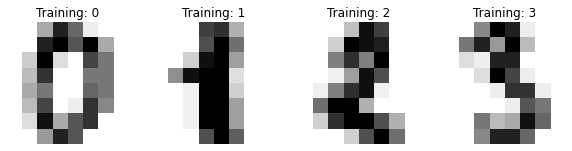

In [11]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [52]:
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
from sklearn.metrics import accuracy_score

gammas = [0.01,0.001,0.0001]
Cs = [0.1,0.2,0.5,0.7,1,2,3]

df =pd.DataFrame()

pg = []
pc =[]
acc =[]

for gamma in gammas:
    for c in Cs:
        # Create a classifier: a support vector classifier
        clf = svm.SVC(gamma=gamma, C=c)
        
        # Split data into 50% train and 50% test subsets
        X_train, X_test, y_train, y_test = train_test_split(
            data, digits.target, test_size=0.5, shuffle=False
        )
        
        # Learn the digits on the train subset
        clf.fit(X_train, y_train)

        # Predict the value of the digit on the test subset
        predicted = clf.predict(X_test)
        
        score = accuracy_score(y_test,predicted)
        
        pg.append(gamma)
        pc.append(c)
        acc.append(score)
        
        
df['Gamma'] = pg
df['C']= pc
df['Accuracy'] = acc

df
        
        




,Gamma,C,Accuracy
0,0.0100,0.1,0.101224
1,0.0100,0.2,0.101224
2,0.0100,0.5,0.166852
3,0.0100,0.7,0.406007
4,0.0100,1.0,0.697442
5,0.0100,2.0,0.706340
6,0.0100,3.0,0.706340
7,0.0010,0.1,0.921023
8,0.0010,0.2,0.949944
9,0.0010,0.5,0.959956


In [53]:
ac= df['Accuracy']
maximum = ac.max()
index = ac.idxmax()

print("The best test score is ", maximum," corresponding to hyperparameters gamma= ",pg[index]," C=",pc[index])

The best test score is  0.9710789766407119  corresponding to hyperparameters gamma=  0.001  C= 2


In [54]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

hyper_params = [ {'gamma':[0.01,0.001,0.0001] ,
                     'C': [0.1,0.2,0.5,0.7,1,2,3]}]

model = svm.SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

model_cv.fit(X_train, y_train)

cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

Fitting 5 folds for each of 21 candidates, totalling 105 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.099137,0.007254,0.023508,0.009991,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.066667,0.066667,0.066667,...,0.065698,0.008912,20,0.110028,0.108635,0.110028,0.107093,0.115438,0.110244,0.002814
1,0.071878,0.007648,0.025821,0.008459,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.955556,0.955556,0.933333,...,0.943191,0.011437,12,0.966574,0.959610,0.965181,0.955494,0.970793,0.963530,0.005379
2,0.096106,0.007746,0.018501,0.005748,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.722222,0.666667,0.683333,...,0.655785,0.048556,17,0.729805,0.735376,0.720056,0.689847,0.673157,0.709648,0.024084
3,0.099997,0.007657,0.028126,0.006249,0.2,0.01,"{'C': 0.2, 'gamma': 0.01}",0.066667,0.066667,0.066667,...,0.065698,0.008912,20,0.110028,0.108635,0.110028,0.107093,0.115438,0.110244,0.002814
4,0.055354,0.007113,0.019823,0.006078,0.2,0.001,"{'C': 0.2, 'gamma': 0.001}",0.961111,0.983333,0.972222,...,0.971043,0.008920,8,0.990251,0.987465,0.991643,0.988873,0.990264,0.989699,0.001420
5,0.071871,0.007651,0.021877,0.007652,0.2,0.0001,"{'C': 0.2, 'gamma': 0.0001}",0.900000,0.911111,0.888889,...,0.895307,0.019862,13,0.912256,0.915042,0.915042,0.901252,0.922114,0.913141,0.006781
6,0.099998,0.007650,0.025001,0.007652,0.5,0.01,"{'C': 0.5, 'gamma': 0.01}",0.088889,0.144444,0.100000,...,0.109125,0.021540,19,0.977716,0.956825,0.894150,0.940195,0.961057,0.945989,0.028537
7,0.045061,0.007683,0.017107,0.002948,0.5,0.001,"{'C': 0.5, 'gamma': 0.001}",0.983333,0.994444,0.983333,...,0.988870,0.004962,5,0.998607,0.998607,0.998607,1.000000,0.997218,0.998608,0.000880
8,0.051953,0.006490,0.015628,0.000002,0.5,0.0001,"{'C': 0.5, 'gamma': 0.0001}",0.944444,0.961111,0.950000,...,0.947647,0.011548,11,0.956825,0.955432,0.965181,0.952712,0.958275,0.957685,0.004173
9,0.110218,0.014094,0.027427,0.006158,0.7,0.01,"{'C': 0.7, 'gamma': 0.01}",0.211111,0.316667,0.266667,...,0.269503,0.043017,18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [55]:
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9910924891371818 corresponding to hyperparameters {'C': 2, 'gamma': 0.001}


Below we visualize the first 4 test samples and show their predicted
digit value in the title.



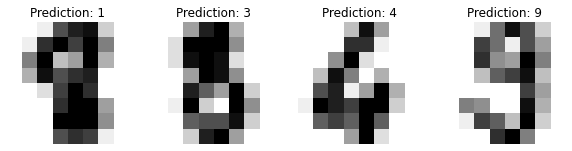

In [17]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [6]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.97      0.97        91
           2       0.99      0.97      0.98        86
           3       0.98      0.88      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.97      0.99      0.98        89
           8       0.93      0.94      0.94        88
           9       0.88      0.98      0.93        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899




We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 1  0 83  1  0  0  0  0  0  1]
 [ 0  0  0 80  0  3  0  3  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  1  0  0  0  0  0  0 83  4]
 [ 0  0  0  1  0  1  0  0  0 90]]


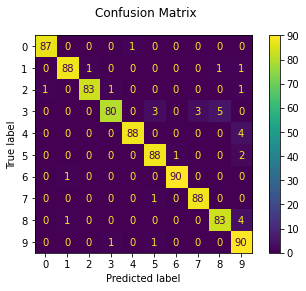

In [7]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()